In [193]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
npts = 1000
xlow = -5.0*np.pi
xhigh = 5.0*np.pi

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/xhigh
#       f = omega/(2.0*np.pi) = n/(2.0*xhigh)
#
#       f_nyquist = n_max/(2.0*xhigh)
#
#       n_max = 2.0*xhigh*f_nyquist

nterms = int(2.0*xhigh*f_nyquist)

print ('Max terms = ',nterms)

nterms = 500

Nyquist frequency =  15.915494309189533
Max terms =  500


In [290]:
f_signal = 1.7/(2.0*np.pi)
w = f_signal*2.0*np.pi

fx = []
for i in range(len(x)):
    fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*x[i]))

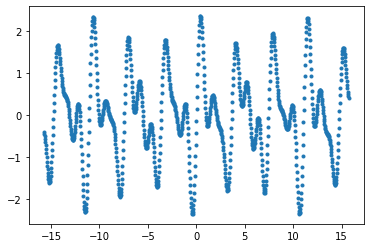

In [291]:
plt.plot(x,fx,'.')

In [292]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):

    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0
    P = xhigh
    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P)        

Data: n = 1.0000, a_n = 0.0000, bn = -0.0083
Data: n = 2.0000, a_n = -0.0000, bn = 0.0175
Data: n = 3.0000, a_n = 0.0000, bn = -0.0284
Data: n = 4.0000, a_n = -0.0000, bn = 0.0428
Data: n = 5.0000, a_n = -0.0000, bn = -0.0643
Data: n = 6.0000, a_n = 0.0000, bn = 0.1015
Data: n = 7.0000, a_n = -0.0000, bn = -0.1870
Data: n = 8.0000, a_n = 0.0000, bn = 0.6115
Data: n = 9.0000, a_n = 0.0000, bn = 0.6602
Data: n = 10.0000, a_n = -0.0000, bn = -0.2361


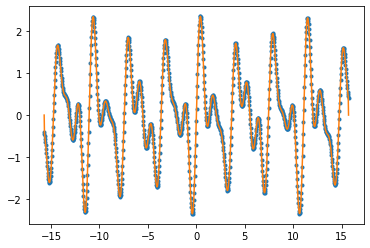

In [293]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

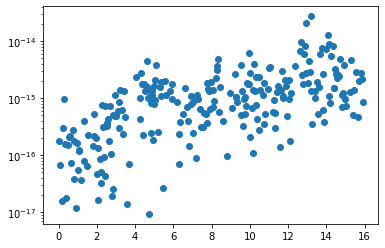

In [294]:
plt.plot(fn,an,'o')
plt.yscale("log")

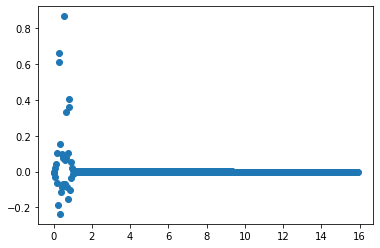

In [295]:
plt.plot(fn,bn,'o')

(0.0, 2.0)

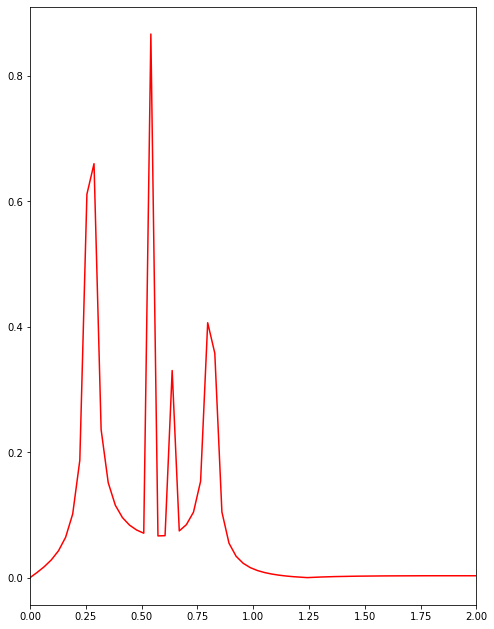

In [296]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_xlim(0.0,2.0)

In [302]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.virginia.gov", None)
results = client.get("bre9-aqqr", limit=30000)
results_df = pd.DataFrame.from_records(results)

In [304]:
results_df['date'] = pd.to_datetime(results_df['report_date'])
results_df['date_delta'] = (results_df['date'] - results_df['date'].min())  / np.timedelta64(1,'D')

results_df['total_casesI'] = pd.to_numeric(results_df['total_cases'])

total_case_values = results_df['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df)):
    new_cases.append(total_case_values[i]-total_case_values[i-1]) 

results_df['new_cases']=new_cases
results_df.head()

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,date,date_delta,total_casesI,new_cases
0,2020-10-15T00:00:00.000,51001,Accomack,Eastern Shore,1197,92,19,2020-10-15,212.0,1197,0
1,2020-10-15T00:00:00.000,51003,Albemarle,Thomas Jefferson,1452,84,22,2020-10-15,212.0,1452,255
2,2020-10-15T00:00:00.000,51005,Alleghany,Alleghany,83,8,4,2020-10-15,212.0,83,-1369
3,2020-10-15T00:00:00.000,51007,Amelia,Piedmont,133,14,5,2020-10-15,212.0,133,50
4,2020-10-15T00:00:00.000,51009,Amherst,Central Virginia,507,19,4,2020-10-15,212.0,507,374


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


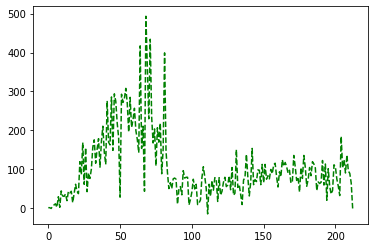

In [305]:
results_df4 = results_df[results_df.locality == 'Fairfax']
#plt.plot(results_df4['date_delta'],results_df4['total_casesI'],'g-')
total_case_values = results_df4['total_casesI'].values
new_cases = []
new_cases.append(0)
for i in range(1,len(results_df4)):
    new_cases.append(total_case_values[i-1]-total_case_values[i]) 
results_df4['new_cases']=new_cases
plt.plot(results_df4['date_delta'],results_df4['new_cases'],'g--')

In [308]:
tmin = results_df4['date_delta'].min()
tmax = results_df4['date_delta'].max()

print (tmin,tmax)

0.0 212.0
